<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/Trabalho2_DOGS_Image_Processing_CNN_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


In [2]:
!gdown --id 1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO

Downloading...
From: https://drive.google.com/uc?id=1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO
To: /content/ann_dogs.zip
6.82MB [00:00, 107MB/s]


In [3]:
import zipfile
file_name = zipfile.ZipFile('ann_dogs.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='ann_dogs.zip'
Img_Size = 100
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_gray.append(cv2.resize(cv2.imread(name, 3),(Img_Size,Img_Size)))

In [5]:
y_names = [] # colocou as tres primeiras letras e colocou na lista de todas as imagens
for yy in img_name:
  name = yy[9]+yy[10]+yy[11]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names: #criacao das listas da ann
  if yy not in unique_list:
    unique_list.append(yy)
unique_list #criou as categorias dos cachorros

['BAS', 'BUL', 'LAB', 'POO']

In [7]:
n = len(unique_list)
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

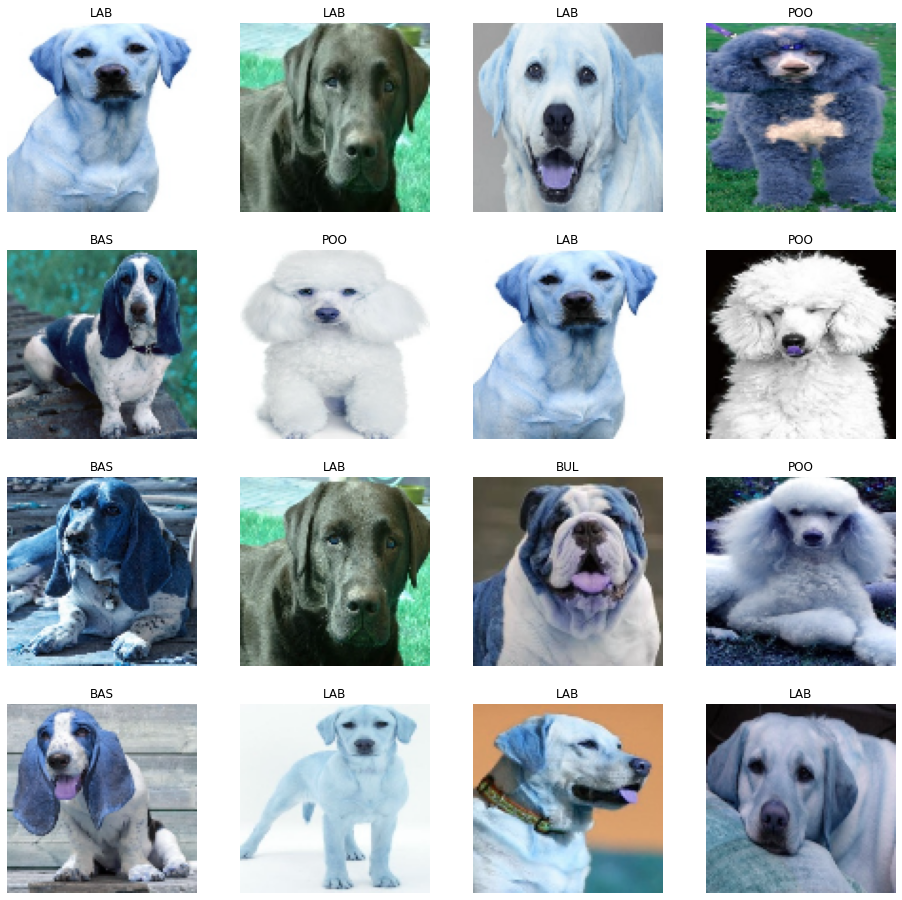

In [8]:
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(16): #mostra fotos aleatorias da biblioteca
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [9]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel()) #transforma as fotos/matrizes em linhas 

X = pd.DataFrame(x_data)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) #separando os dataset em test e train

In [11]:
# helper
def ynindicator(y):
  N = len(y)
  K = len(set(y))
  I = np.zeros((N, K))
  I[np.arange(N), y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers
model = Sequential()

#Convulução dos dados
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=120))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(units=K))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
8/8 [==============================] - 18s 44ms/step - loss: 5.7602 - accuracy: 0.3011
Epoch 2/40
8/8 [==============================] - 0s 18ms/step - loss: 1.9889 - accuracy: 0.4248
Epoch 3/40
8/8 [==============================] - 0s 18ms/step - loss: 1.1623 - accuracy: 0.4751
Epoch 4/40
8/8 [==============================] - 0s 18ms/step - loss: 1.0853 - accuracy: 0.5111
Epoch 5/40
8/8 [==============================] - 0s 17ms/step - loss: 0.9775 - accuracy: 0.5914
Epoch 6/40
8/8 [==============================] - 0s 18ms/step - loss: 0.8399 - accuracy: 0.6689
Epoch 7/40
8/8 [==============================] - 0s 18ms/step - loss: 0.7618 - accuracy: 0.6730
Epoch 8/40
8/8 [==============================] - 0s 17ms/step - loss: 0.7766 - accuracy: 0.6475
Epoch 9/40
8/8 [==============================] - 0s 18ms/step - loss: 0.6592 - accuracy: 0.7257
Epoch 10/40
8/8 [==============================] - 0s 17ms/step - loss: 0.7087 - accuracy: 0.6950
Epoch 11/40
8/8 [===========

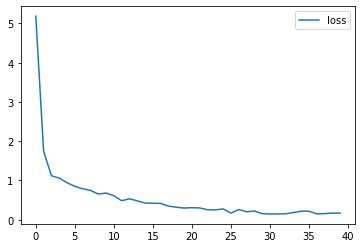

In [13]:
# Plota a tendência de loss
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()


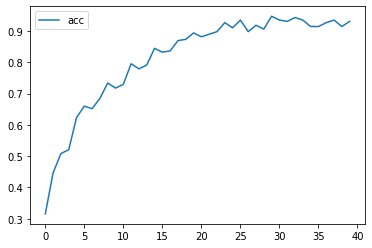

In [14]:
# Plota a tendência da acurácia
plt.plot(r.history['accuracy'], label='acc')
plt.legend()
plt.show()

In [15]:
ynew = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
N_test = len(ynew)

In [17]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")

In [18]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
y_true = y_class.copy()

In [19]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [20]:
target_names = ['Basset', 'Bulldog', 'Labrador', 'Poodle']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Basset       0.89      0.74      0.81        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.69      0.87      0.77        23
      Poodle       0.64      0.82      0.72        11

    accuracy                           0.74        62
   macro avg       0.56      0.61      0.57        62
weighted avg       0.70      0.74      0.71        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
